In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cristianoronaldo as cr7

In [ ]:
df_it = cr7.cargar_dataset('Copia de Bologna_Italia.csv')
df_it = df_it.drop(df_it.columns[0], axis=1)


In [52]:
nulos_it = cr7.identificar_nulos(df_it)
nulos_it

('Nulos por columna:',
 id                                                 0
 scrape_id                                          0
 last_scraped                                       0
 source                                             0
 host_id                                            0
 host_since                                         0
 host_response_time                               470
 host_response_rate                               470
 host_acceptance_rate                             214
 host_is_superhost                                151
 host_listings_count                                0
 host_has_profile_pic                               0
 host_identity_verified                             0
 neighbourhood_cleansed                             0
 latitude                                           0
 longitude                                          0
 property_type                                      0
 room_type                                          0
 acco

In [53]:
df_italy = cr7.sust_nulos_bfill(df_it)
df_italy = cr7.sust_nulos_ffill(df_it)

/Users/juan/Desktop/analisis de datos/alfredo/funciones/cristianoronaldo.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill')
/Users/juan/Desktop/analisis de datos/alfredo/funciones/cristianoronaldo.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='ffill')


In [54]:
df_italy = cr7.sust_nulos_constante(df_it)

In [55]:
nulos_it = cr7.identificar_nulos(df_italy)
nulos_it

('Nulos por columna:',
 id                                              0
 scrape_id                                       0
 last_scraped                                    0
 source                                          0
 host_id                                         0
 host_since                                      0
 host_response_time                              0
 host_response_rate                              0
 host_acceptance_rate                            0
 host_is_superhost                               0
 host_listings_count                             0
 host_has_profile_pic                            0
 host_identity_verified                          0
 neighbourhood_cleansed                          0
 latitude                                        0
 longitude                                       0
 property_type                                   0
 room_type                                       0
 accommodates                                    0
 bathroo

In [56]:
df_italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4668 non-null   int64  
 1   scrape_id                                     4668 non-null   float64
 2   last_scraped                                  4668 non-null   object 
 3   source                                        4668 non-null   object 
 4   host_id                                       4668 non-null   int64  
 5   host_since                                    4668 non-null   object 
 6   host_response_time                            4668 non-null   object 
 7   host_response_rate                            4668 non-null   object 
 8   host_acceptance_rate                          4668 non-null   object 
 9   host_is_superhost                             4668 non-null   o

In [60]:
df_italy[df_italy.columns[0]] = df_italy[df_italy.columns[0]].astype(str) 
df_italy[df_italy.columns[1]] = df_italy[df_italy.columns[1]].astype(str)
df_italy[df_italy.columns[4]] = df_italy[df_italy.columns[4]].astype(str)

In [61]:
cuantitativas_it = df_italy.iloc[:, [10, 14, 15, 18, 19, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49]]
cualitativas_it = df_italy.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 16, 17, 20, 23, 24, 34, 35, 43, 44]]

In [62]:
cuantitativas_it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           4668 non-null   int64  
 1   latitude                                      4668 non-null   float64
 2   longitude                                     4668 non-null   float64
 3   accommodates                                  4668 non-null   int64  
 4   bathrooms                                     4668 non-null   float64
 5   bedrooms                                      4668 non-null   float64
 6   beds                                          4668 non-null   float64
 7   minimum_nights                                4668 non-null   int64  
 8   maximum_nights                                4668 non-null   int64  
 9   availability_30                               4668 non-null   i

<Figure size 1500x800 with 0 Axes>

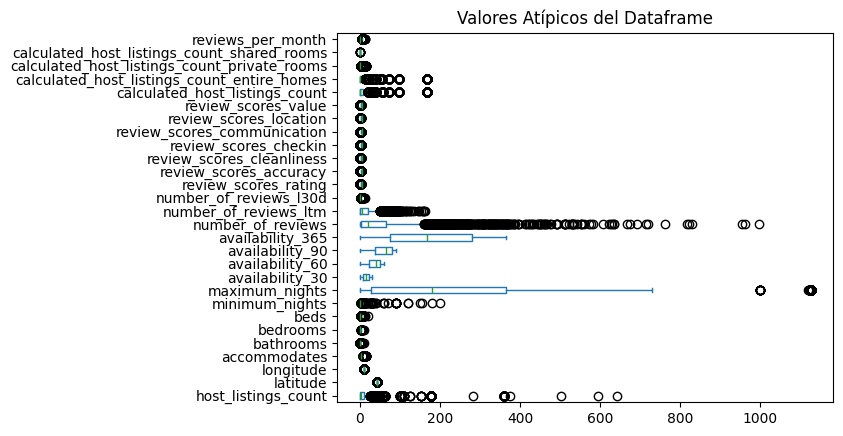

In [63]:
fig = plt.figure(figsize=(15,8))
cuantitativas_it.plot(kind='box',vert=False)
plt.title('Valores Atípicos del Dataframe')
plt.show()

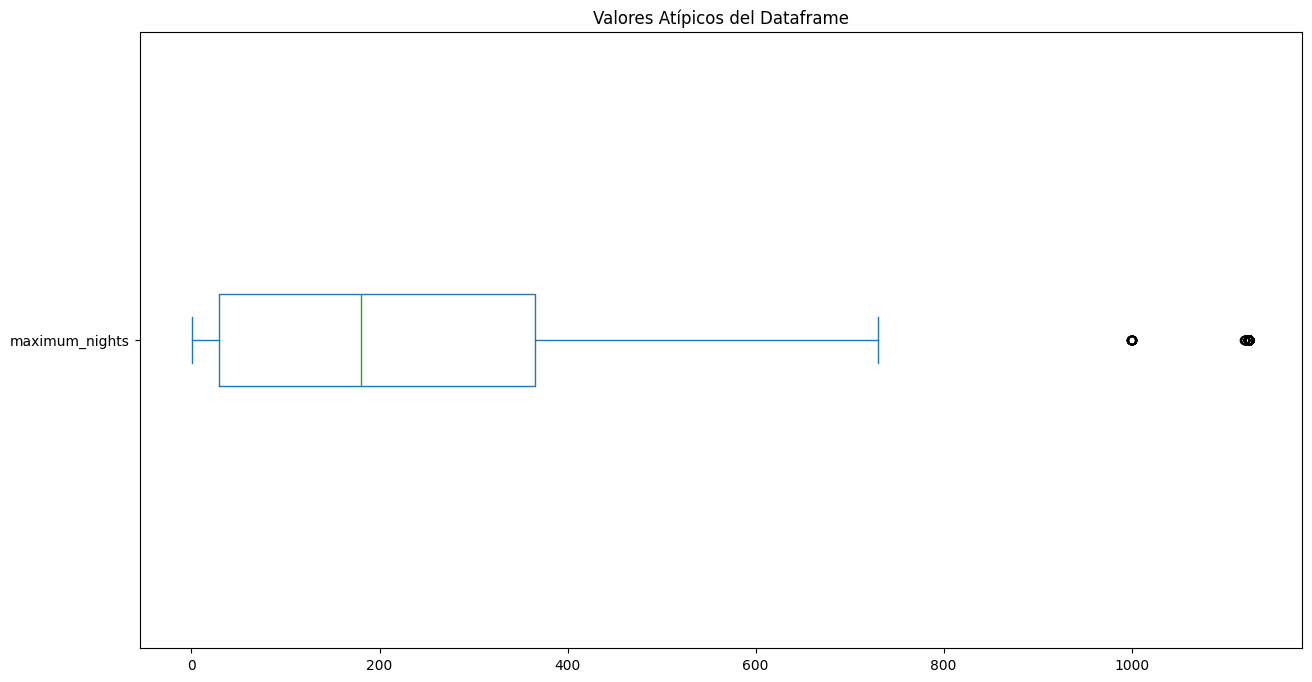

In [66]:
fig = plt.figure(figsize=(15,8))
cuantitativas_it['maximum_nights'].plot(kind='box',vert=False)
plt.title('Valores Atípicos del Dataframe')
plt.show()

In [67]:
y = cuantitativas_it

percentile25 = y.quantile(0.25)#Q1
percentile75 = y.quantile(0.75)#Q1
iqr = percentile75-percentile25

limite_superior_iqr = percentile75+1.5*iqr
limite_inferior_iqr = percentile25-1.5*iqr
print('Limite superior permitido',limite_superior_iqr)
print('Limite inferior permitido',limite_inferior_iqr)

Limite superior permitido host_listings_count                              26.000000
latitude                                         44.518520
longitude                                        11.376946
accommodates                                      7.000000
bathrooms                                         1.000000
bedrooms                                          3.500000
beds                                              3.500000
minimum_nights                                    3.500000
maximum_nights                                  869.000000
availability_30                                  48.000000
availability_60                                  95.500000
availability_90                                 143.000000
availability_365                                587.500000
number_of_reviews                               159.000000
number_of_reviews_ltm                            51.000000
number_of_reviews_l30d                            2.500000
review_scores_rating          

In [68]:
data_it_iqr = cuantitativas_it[(y<=limite_superior_iqr) & (y>=limite_inferior_iqr)]
data_it_iqr

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,44.491630,11.333980,2.0,1.0,1.0,1.0,2.0,730.0,21,...,4.60,4.83,4.85,4.84,4.68,2.0,0.0,2.0,0.0,2.60
1,2.0,44.488170,11.341240,1.0,1.0,1.0,2.0,NaN,NaN,30,...,4.67,4.85,4.79,4.82,4.66,2.0,0.0,2.0,0.0,1.64
2,1.0,44.478880,11.356250,5.0,NaN,2.0,NaN,2.0,30.0,10,...,4.84,4.98,4.98,4.80,4.82,1.0,1.0,0.0,0.0,0.40
3,2.0,44.487870,11.353920,2.0,1.0,1.0,1.0,NaN,180.0,25,...,4.94,4.89,4.92,4.83,4.78,2.0,2.0,0.0,0.0,1.10
4,1.0,44.510720,11.349570,4.0,1.0,1.0,NaN,3.0,60.0,21,...,4.92,4.95,4.95,4.51,4.74,1.0,1.0,0.0,0.0,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4663,1.0,44.514692,11.348268,4.0,NaN,2.0,NaN,2.0,365.0,9,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.00
4664,8.0,44.498025,NaN,5.0,1.0,2.0,3.0,1.0,365.0,23,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.00
4665,NaN,44.477472,NaN,4.0,1.0,1.0,2.0,1.0,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.00
4666,1.0,44.489727,11.368937,6.0,1.0,2.0,NaN,1.0,30.0,28,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.00


In [69]:
nulos_it = cr7.identificar_nulos(data_it_iqr)
nulos_it

('Nulos por columna:',
 host_listings_count                              750
 latitude                                         289
 longitude                                        501
 accommodates                                     110
 bathrooms                                       1118
 bedrooms                                          51
 beds                                             444
 minimum_nights                                   268
 maximum_nights                                   994
 availability_30                                    0
 availability_60                                    0
 availability_90                                    0
 availability_365                                   0
 number_of_reviews                                437
 number_of_reviews_ltm                            290
 number_of_reviews_l30d                           365
 review_scores_rating                             545
 review_scores_accuracy                           622
 revi

In [70]:
dataf_it_iqr = data_it_iqr.copy()
dataf_it_iqr = dataf_it_iqr.fillna(round(data_it_iqr.mean(),1))
dataf_it_iqr

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,44.491630,11.333980,2.0,1.0,1.0,1.0,2.0,730.0,21,...,4.60,4.83,4.85,4.84,4.68,2.0,0.0,2.0,0.0,2.60
1,2.0,44.488170,11.341240,1.0,1.0,1.0,2.0,1.6,154.3,30,...,4.67,4.85,4.79,4.82,4.66,2.0,0.0,2.0,0.0,1.64
2,1.0,44.478880,11.356250,5.0,1.0,2.0,1.6,2.0,30.0,10,...,4.84,4.98,4.98,4.80,4.82,1.0,1.0,0.0,0.0,0.40
3,2.0,44.487870,11.353920,2.0,1.0,1.0,1.0,1.6,180.0,25,...,4.94,4.89,4.92,4.83,4.78,2.0,2.0,0.0,0.0,1.10
4,1.0,44.510720,11.349570,4.0,1.0,1.0,1.6,3.0,60.0,21,...,4.92,4.95,4.95,4.51,4.74,1.0,1.0,0.0,0.0,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4663,1.0,44.514692,11.348268,4.0,1.0,2.0,1.6,2.0,365.0,9,...,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0,0.00
4664,8.0,44.498025,11.300000,5.0,1.0,2.0,3.0,1.0,365.0,23,...,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0,0.00
4665,4.5,44.477472,11.300000,4.0,1.0,1.0,2.0,1.0,154.3,9,...,4.80,4.90,4.90,4.80,4.70,3.7,2.1,1.0,0.0,0.00
4666,1.0,44.489727,11.368937,6.0,1.0,2.0,1.6,1.0,30.0,28,...,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0,0.00


In [71]:
datos_limpios_it = pd.concat([cualitativas_it,dataf_it_iqr],axis=1)
datos_limpios_it

,id,scrape_id,last_scraped,source,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,46352,20241200000000.0,20/12/24,city scrape,467810,28/03/11,within a day,75%,47%,f,...,4.60,4.83,4.85,4.84,4.68,2.0,0.0,2.0,0.0,2.60
1,59697,20241200000000.0,20/12/24,city scrape,286688,14/11/10,within a day,50%,50%,f,...,4.67,4.85,4.79,4.82,4.66,2.0,0.0,2.0,0.0,1.64
2,85368,20241200000000.0,20/12/24,city scrape,467675,28/03/11,within an hour,86%,73%,t,...,4.84,4.98,4.98,4.80,4.82,1.0,1.0,0.0,0.0,0.40
3,219878,20241200000000.0,20/12/24,city scrape,1139326,10/09/11,within an hour,100%,95%,t,...,4.94,4.89,4.92,4.83,4.78,2.0,2.0,0.0,0.0,1.10
4,229114,20241200000000.0,20/12/24,city scrape,1196205,22/09/11,within an hour,100%,100%,t,...,4.92,4.95,4.95,4.51,4.74,1.0,1.0,0.0,0.0,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4663,1313000380973535546,20241200000000.0,20/12/24,city scrape,544361826,01/11/23,within an hour,100%,100%,f,...,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0,0.00
4664,1313110982817717217,20241200000000.0,20/12/24,city scrape,188501962,08/05/18,within an hour,100%,100%,f,...,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0,0.00
4665,1313561759074862226,20241200000000.0,20/12/24,city scrape,487811050,15/11/22,within an hour,100%,97%,f,...,4.80,4.90,4.90,4.80,4.70,3.7,2.1,1.0,0.0,0.00
4666,1313866745290565660,20241200000000.0,20/12/24,city scrape,143510739,31/07/17,within an hour,100%,0,f,...,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0,0.00


In [72]:
nulos_it = cr7.identificar_nulos(datos_limpios_it)
nulos_it

('Nulos por columna:',
 id                                              0
 scrape_id                                       0
 last_scraped                                    0
 source                                          0
 host_id                                         0
 host_since                                      0
 host_response_time                              0
 host_response_rate                              0
 host_acceptance_rate                            0
 host_is_superhost                               0
 host_has_profile_pic                            0
 host_identity_verified                          0
 neighbourhood_cleansed                          0
 property_type                                   0
 room_type                                       0
 bathrooms_text                                  0
 amenities                                       0
 price                                           0
 first_review                                    0
 last_re

In [73]:
datos_limpios_it.to_csv('Datos_limpios_Bologna_Italia.csv')